# Statistical Learning Theory
### By J. Sebastian Tenjo G.

The following document presents the solution of the exercises proposed in Mathematics class on machine learning, they are theoretical exercises and some simple applications using Julia.

In [4]:
#Importing the required data analysis libraries
using DataFrames
using Distributions
using Plots

## Exercise 1.2

Suppose we use a perceptron to detect spam messages. Let's say that each email message is represented by the frequency of occurrence of keywords, and the result is whether the message is considered spam.

- Can you think of any keywords that will end up with a large positive weight in the perceptron?

- What about keywords that will get a negative weight?

- What parameter in the perceptron directly affects how many limit messages end up being classified as spam?

### Solution 

- a) Words that entice people to open the spam mail and that usually have scams or information that commits the user to perform further procedures in order to obtain a reward, e.g. Prize, offer, money, free, free, limited time, investment, independence, selected

- b) In general, words that are constantly used in formal or business mailings or that communicate important information, the latter because we use these words frequently in the language. For example: Attention, thank you, attached, greetings, usual words such as connectives, prepositions or verbs, comments, document, format.

- c) The unit of bias known in the perceptron as the parameter b, will be the threshold for classification of spam messages, by altering the value of b which represents a distance from a certain datum to the perceptron the number of messages can be modified.



## Exercise 1.3 

The weight update rule $ w(t+1) = w(t) + y(t)x(t) $ has the good interpretation that it is moving in the direction of classifying correctly


- Show that $ y(t) w^{T}(t)x(t) < 0$ 

### Solution

Suppose  $x(t)$ is missclasified by $w(t)$, this happends when $sign(w^{T}(t)x(t) \neq y(t) $ so  $y(t) w^{T}(t)x(t) < 0$ 

- Show that $y(t)w^{T}(t+1)x(t)> y(t)w^{T}(t)x(t)$.

### Solution





According to the weight update rule 

\begin{align}
 y(t)w^{T}(t+1)x(t) &= y(t)(w(t) + y(t)x(t))^{T}x(t)\ \rightarrow{}\text{by definition}\\
  &= y(t)w^{T}(t)x(t) + y(t)y(t)x^{T}(t)x(t)  \rightarrow{}\ \text{expanding and distributing}\\
  &= y(t)w(t)^{T}x(t)+y^{2}(t)x^{T}(t)x(t)  \rightarrow{}\ \text{grouping} \\
  &=y(t)w^{T}(t)x(t) + x^{T}(t)x(t)  \rightarrow{}\ \text{grouping}\\
  &> y(t)w^{T}(t)x(t)  \rightarrow{}\ \text{applying inequality}
  \end{align}
 
- With regard to classification, he argues that the step $w(t)$ of $w(t+1)$  is a step 'in the right direction'.

### Solution 

From the previous paragraph, two possible cases can be inferred to prove this item

- Suppose $y(t) = -1$ , therefore $w(t+1)^{T}x(t) > 0$, the iteration goes to the negative value, thus "going in the right direction".
- Suppose $y(t) = 1$, therefore $w(t+1)^{T}x(t) < 0$, the iteration goes to the positive value, thus "going in the right direction".

This satisfies the desired condition


## Exercise 1.10


Here is an experiment that illustrates the difference between a single container and multiple containers. Run a computer simulation to flip 1000 fair coins. Toss each coin independently 10 times. Let's focus on 3 coins as follows: 
 $c_1$ is the first coin flipped; $c_{rand}$ is a coin you choose at random; $c_{min}$ is the coin that had the minimum frequency of heads (choose the previous one in case of a tie). Let $v, v_1 , v_{min}$  the fraction of heads you get for the respective three coins.

- What is it for the three selected coins?

### Solution 

For the three coins selected,$\mu = 0,5$ since that is the probability of getting heads after a fair coin toss, and each toss is performed independently.

- Repeat this whole experiment a large number of times (e.g., 100000 runs of the whole experiment) to obtain several instances of $v_1, v_{rand}, v_{min}$ and plot the histograms of the distributions of $v_1, v_{rand}, v_{min}$ .Note which coins end up being $c_{rand}, c_{min}$ and may differ from one run to another.

The following code presents the construction of the histograms

In [31]:
# We define a function to flip a certain number of times
function Throw_Coins(coins, times)
    list = [ [ [i] for i in 1:coins]]
    for i in 1:coins
        # Heads: 1 - Seals: 0
        coin_i = zeros(times) 
        probs = rand(times)
        for j in 1:length(probs)
           if probs[j]>=0.5
           Coin_i[j]=1        
           end            
        end
        list[i] = Coin_i
    end
    return list
end;

In [32]:
#define a function to obtain the frequency of faces
function Num_face(lista, imoneda)
    c = list[imoneda]
    v=0
    for i in c
        if i==1
        v+=1
        end
    end
    return v
end;


In [45]:
# Simulation  1000 independent fair coins
coins = []
for i in 1:1000
    coin = Bernoulli(0.5)
    push!(coins, coin)
end

function flip(c,times)
    f = rand(c,times)
    return f
end

function simu(times)
    results = []
    for coin in coins
        push!(results, flip(coin,times))
    end
    return results
end

simu (generic function with 1 method)

In [46]:
function coinsample(result)
    return count(i->(i==1), result)/size(result)[1]
end

function stsimu(sim)
    frec_heads = []
    for result in sim
        push!(frec_heads, count(i->(i==1), result))
    end
    m = minimum(frec_heads)
    index = findfirst(isequal(m),frec_heads)
    p = rand(1:1000)
    c_1 = sim[1]
    c_rand = sim[p]
    c_min = sim[index]
    v_1 = coinsample(c_1)
    v_rand = coinsample(c_rand)
    v_min = coinsample(c_min)
    return v_1, v_rand, v_min
end

stsimu (generic function with 1 method)

In [50]:
# Code for obtein  v_1, v_rand and v_min
V1 = []
VR = []
VM = []
for i in 1:100000
    s = simu(10)
    v_1,v_rand,v_min = stsimu(s)
    push!(V1,v_1)
    push!(VR, v_rand)
    push!(VM, v_min)
end
n_bins = 10
ylims_plot = (0,80000);

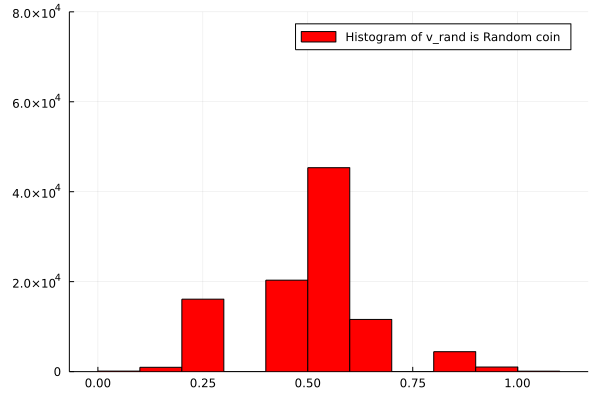

In [51]:
histogram(VR, bins=n_bins, ylims=ylims_plot, label = " Histogram of v_rand is Random coin",color ="red")

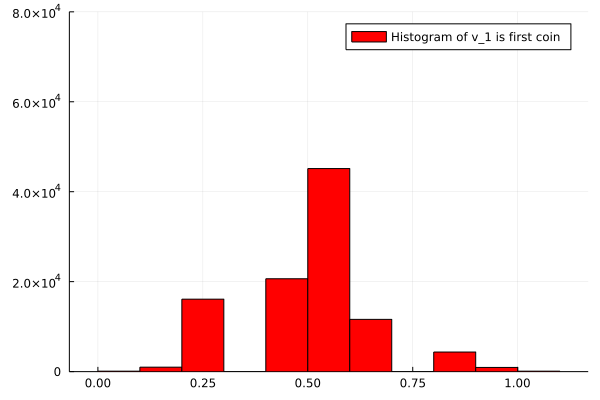

In [52]:
histogram(V1, bins=n_bins, ylims=ylims_plot, label = "Histogram of v_1 is first coin",color="Red")

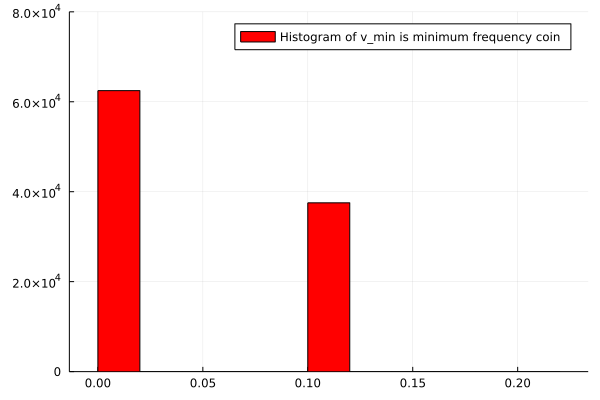

In [53]:
histogram(VM, bins=n_bins, ylims=ylims_plot, label = "Histogram of v_min is minimum frequency coin",color ="Red")

- Using the previous item plot the estimates of $\mathbb{P}[|v-\mu| > \epsilon]$ as a function of together with the Hoeffding's bound $2e^{2\epsilon^{2}N}$(on the same graph).

Since each frequency $v$ corresponds to a sample of 10 data points, the Hoeffding's bound in this experiment will be given by 
$\mathbb{P}[|v-\mu| > \epsilon]< 2e^{-20\epsilon^{2}N}$ Now, for some values of $\epsilon$ , we plot the Hoeffding's bound along with our resulting estimates for $\mathbb{P}[|v_1-\mu|]$ , $\mathbb{P}[|v_{rand}-\mu|]$ , $ \mathbb{P}[|v_{min}-\mu|]$, the next code present this solution

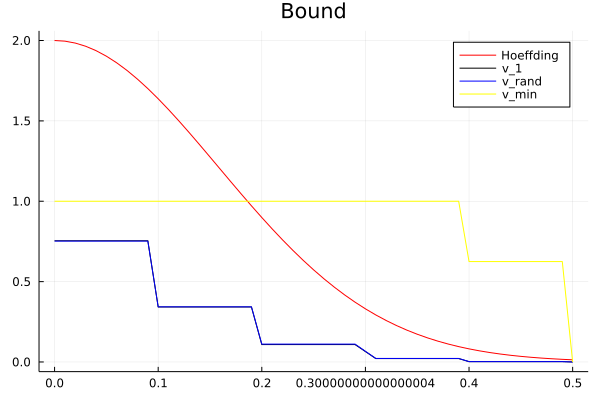

In [55]:
function hoeffding(ep, N)
    return 2.0*exp(-2.0*N*(ep^2))
end
epsilon = collect(0:0.01:0.5) # Range of values for epsilon
bounds = [hoeffding(ep,10) for ep in epsilon]; # Range of bounds for each epsilon given N = 10

vd_1 = [abs(v-0.5) for v in V1]
vd_rand = [abs(v-0.5) for v in VR]
vd_min = [abs(v-0.5) for v in VM]

l = size(epsilon)[1]
p1 = zeros(l)
prand = zeros(l)
pmin = zeros(l)

for i in 1:l
    ep = epsilon[i]
    p1[i] = count(i->(i>ep),vd_1)/100000
    prand[i] = count(i->(i>ep),vd_rand)/100000
    pmin[i] = count(i->(i>ep),vd_min)/100000
end
plot(epsilon, bounds,title = "Bound", formatter = identity, label = "Hoeffding", legend = :topright,color="Red")
plot!(epsilon, p1, label = "v_1", legend = :topright, color = "Black")
plot!(epsilon, prand, label = "v_rand", lengend = :topright,color = "Blue")
plot!(epsilon, pmin, label = "v_min", legend = :topright, color = "Yellow")

- Which coins obey Hoeffding's coordinate and which do not? Explain why.

### Solution 

The coins that obeyed the Hoeffding Inequality are the first coin $c_1$ and the random coin $c_{rand}$, while the coin with the minimum frequency of faces $c_{min} $does not. This happens because when we toss the first coin ten times, we are collecting a random sample of ten data points that follow the binomial distribution with $p = 0,5$ . That is, from a container whose half of the balls are green, we are collecting a sample of ten balls, so the probability that the difference between $\mu $ and $v$ is greater than will certainly follow the Hoeffding bound. The same is true for the coin that is chosen at random. Therefore the first coin and the random coin follow the hoeffding limit, however the coin with the minimum frequency of faces does not, and this is because the hypothesis on the latter is not fixed before the experiments take place, since we need to know the results to calculate a coin with these characteristics. This does not satisfy the condition imposed for the hoeffding limit to be satisfied.

- Relate the previous subsection to the multiple garbage cans in Figure 1.10.

### Solution

Each of the 1000 coins represents a sample drawn from a container of infinite balls, each of which has the possibility 0.5 of being either green or red. Then $c_1, c_{rand}$ are random samples from the garbage can and, therefore, Hoeffding's inequality is satisfied for them. Now, the way in which we select the coin $c_{min}$ each time is always by considering all the coins (samples) and choosing the one with the least number of coins (the one with the fewest sides, or the one with the maximum number of green balls). As the container has infinite balls, we can consider it in the same way as we would do with 1000 equal containers and, therefore, the process of selecting $v_{min}$ the coin is the same as in the case we had in the previous case. 
 is the same as the case we had with multiple bins.

## Exercise 1.11

Given a data set $D$ with 25 training examples for an unknown objective function $f: x \rightarrow{} y $, where $x = \mathbb{R}$ and $y = \{-1,1\}$ . To learn , we use a simple set of hypotheses $H =\{h_1,h_2\}$
 where $h_1$ is the constant $+1$ and $h_2$ is the constant $-1$.

We consider two learning algorithms, $S$ (smart) and $C$ (crazy). $S$ chooses the hypothesis that most closely matches $D$ and $C$ chooses the hypothesis deliberately. Let us see how these out-of-sample algorithms work from the deterministic and probabilistic points of view. Suppose in the probabilistic view that there is a probability distribution on $x$, and let $ \mathbb{P}|f(x) = +1| = p$.

- Can $S$ produce a hypothesis that guarantees better performance than random at any point out of $D$?

### Solution 

Even if $D$ has all data in binary classification -1, it does not necessarily lead to a correct out-of-set classification. As a random function has p = 0.5 of generating a correct hypothesis this will always be better compared to $S$, furthermore the data set may not be representative to know the function $f$ , the only strong case above the above is when $p =1$.

- Suppose for the rest of the exercise that all examples in $D$ have $ y_{n} = +1$.Is it possible that the hypothesis you produce $C$ turns out to be better than the hypothesis you produce $S$?

### Solution

As previously presented, when selecting random samples for example it is possible that $C$ will eventually produce a better hypothesis than $S$.


- If  $p=0.9$, what is the probability that $S$  produces a hypothesis better than $C$ .

### Solution 

If in $D$ the majority ranking is +1, then $S$ will choose hypothesis 1 and $C$ will choose hypothesis 2. Therefore, outside of $D$, h_1 will have a 0.9 probability of matching $f$, while $h_2$ will only have the complement of the probability: $1 -0.9 = 0.1$, let's estimate this calculation with the combinatorics in the next code cell


In [7]:
#Binomial formula
sum = 0
for i in 13:25
   sum = sum + binomial(25,i) * (9/10)^i * (1/10)^(25-i)
end
print("S produce a bether hypotesis than C with probability $sum.")

S produce a bether probability than C with 0.9999998379165848.

- Is there any value $p$  for which it is more likely than $C$ not to produce a hypothesis better than $S$?

### Solution 

It is possible, because when $p<0.5$ it may happen that $C$ produces a better hypothesis than $S$, this is because $C$ chooses to produce hypothesis 2 which may eventually coincide better with the function $f$.

## Exercise 1.12

A friend comes to you with a learning problem. She says that the objective $f$ function is completely unknown, but she has $4000$ data points. She is willing to pay you to solve her problem and produce for her one $g$ that approximates . What is the best you can promise her among the following?

- After learning, you will provide her with one $g$ that will guarantee that it approximates $f$ well out of sample.

- After learning, you will provide her with one $g$ and with high probability the $g$  produce will closely approximate $f$ out-of-sample.

- One of two things will happen. (i) You will produce a hypothesis $g$ ; (ii) You will declare that you have failed.

If you return a hypothesis $g$, then with high probability the $g$ produce will be very close to $f$ out-of-sample.

### Solution 

It is not possible to generate an approximation with probability 1 of being equal to $f$ this is independent of the data she has, 4000 data in general can be a good training source but even with more data you never guarantee such a probability completely on $f$ out-of-sample, and likewise within the hypothesis space you cannot guarantee a good enough approximation within the sample. So the first two options are not possible to guarantee but the **third one is because it is much more balanced.**
